In [18]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("../01_customer_support_tickets_clean_group-b.csv")

### Checking Info on data, and verifying clean dataset

In [20]:
print(df.info()) ##printing infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   495 non-null    int64 
 3   agent_name  495 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.6+ KB
None


In [21]:
print(df.head())

                                                text         label  ticket_id  \
0    Where can I find API rate limits documentation?         other       1000   
1                 Can I migrate data from Freshdesk?         other       1001   
2  Cannot update billing address; page keeps relo...       billing       1002   
3  Looking for a product roadmap or upcoming feat...         other       1003   
4              Dark mode toggled but UI stays light.  tech_support       1004   

  agent_name  
0       Dana  
1        Bob  
2    Charlie  
3       Dana  
4      Alice  


In [22]:
print(df.isnull().sum())

text          0
label         0
ticket_id     0
agent_name    0
dtype: int64


In [23]:
df = df.drop_duplicates()

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   495 non-null    int64 
 3   agent_name  495 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.6+ KB
None


### Exploratory Data Check

In [25]:
#verifying columns
print("Available columns:", df.columns.tolist())

Available columns: ['text', 'label', 'ticket_id', 'agent_name']


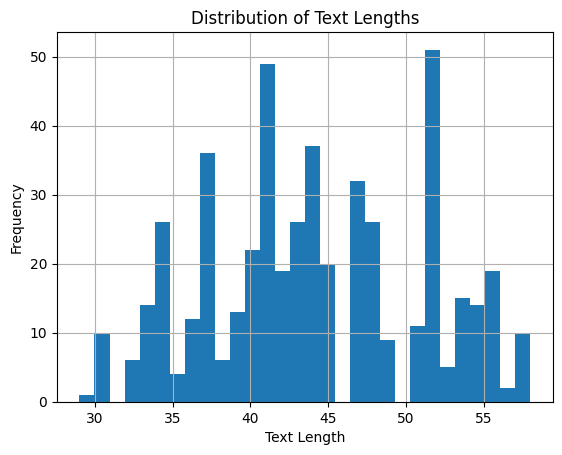

Label Distribution:
label
other           166
tech_support    119
billing         113
account          97
Name: count, dtype: int64


In [26]:
df['text_length'] = df['text'].apply(len)
df['text_length'].hist(bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

print("Label Distribution:")
print(df['label'].value_counts())

In [27]:
df.keys()

Index(['text', 'label', 'ticket_id', 'agent_name', 'text_length'], dtype='object')

In [28]:
# Basic info about the DataFrame
print("=== DATASET INFORMATION ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

=== DATASET INFORMATION ===
Shape: (495, 5)
Columns: ['text', 'label', 'ticket_id', 'agent_name', 'text_length']

Data Types:
text           object
label          object
ticket_id       int64
agent_name     object
text_length     int64
dtype: object

First 5 rows:
                                                text         label  ticket_id  \
0    Where can I find API rate limits documentation?         other       1000   
1                 Can I migrate data from Freshdesk?         other       1001   
2  Cannot update billing address; page keeps relo...       billing       1002   
3  Looking for a product roadmap or upcoming feat...         other       1003   
4              Dark mode toggled but UI stays light.  tech_support       1004   

  agent_name  text_length  
0       Dana           47  
1        Bob           34  
2    Charlie           52  
3       Dana           51  
4      Alice           37  


### Data Splitting 

In [29]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']   # replace with your label column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TF-IDF Vectorization

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Baseline Model 1: Majority Classifier

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

majority = DummyClassifier(strategy="most_frequent")
majority.fit(X_train_tfidf, y_train)
y_pred = majority.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     account       0.00      0.00      0.00        21
     billing       0.00      0.00      0.00        23
       other       0.29      1.00      0.45        29
tech_support       0.00      0.00      0.00        26

    accuracy                           0.29        99
   macro avg       0.07      0.25      0.11        99
weighted avg       0.09      0.29      0.13        99



c:\Users\HUMAIDU\Desktop\groub B\Thrive_Internship_ML_A\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HUMAIDU\Desktop\groub B\Thrive_Internship_ML_A\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HUMAIDU\Desktop\groub B\Thrive_Internship_ML_A\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

### Baseline Model 2: TF-IDF + Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

     account       0.80      0.76      0.78        21
     billing       0.96      1.00      0.98        23
       other       0.83      0.83      0.83        29
tech_support       1.00      1.00      1.00        26

    accuracy                           0.90        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99



### Visualization & Evaluation Summary

In [33]:
## Summarizing the Stats of the data
df.describe()

,ticket_id,text_length
count,495.000000,495.000000
mean,1258.719192,44.137374
std,149.687420,7.115396
min,1000.000000,29.000000
25%,1131.500000,39.000000
50%,1257.000000,44.000000
75%,1388.000000,51.000000
max,1519.000000,58.000000


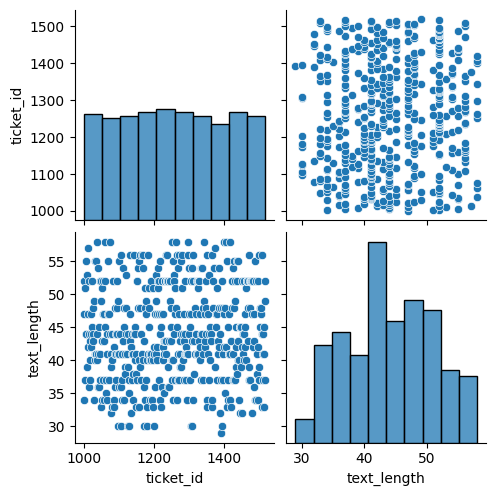

In [34]:
##visualizing the correlation using a scatter plot
import seaborn as sns
sns.pairplot(df)
plt.show()

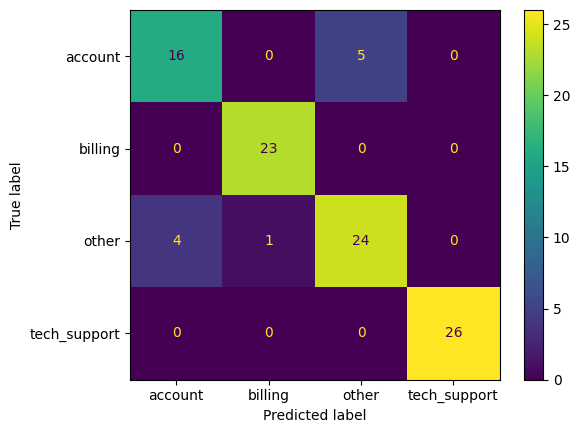

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr, X_test_tfidf, y_test)
plt.show()